In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, classification_report


# 2D model

In [2]:
ground_truth_path = r"D:/deepfakes/data/test/labels.csv"
results_path = r"D:/deepfakes/src/inference/predictions/final_efficient_net4.csv"

In [3]:
target_names = ["REAL", "FAKE"]

In [4]:
results = pd.read_csv(results_path)

In [5]:
results

,filename,label
0,4000.mp4,0.990000
1,4001.mp4,0.990000
2,4002.mp4,0.990000
3,4003.mp4,0.569241
4,4004.mp4,0.017729
...,...,...
3995,7995.mp4,0.063486
3996,7996.mp4,0.070172
3997,7997.mp4,0.022141
3998,7998.mp4,0.951619


## Prepare Data for evaluation

In [6]:
ground_truth = pd.read_csv(ground_truth_path)

In [7]:
ground_truth

,filename,label
0,4000.mp4,1
1,4001.mp4,1
2,4002.mp4,1
3,4003.mp4,0
4,4004.mp4,0
...,...,...
3995,7995.mp4,0
3996,7996.mp4,0
3997,7997.mp4,0
3998,7998.mp4,1


In [8]:
truth_labels = ground_truth["label"].values
predicted_labels = results["label"].values

In [9]:
assert len(truth_labels) == len(predicted_labels)

# Loss

In [10]:
from sklearn.metrics import log_loss

In [11]:
loss = log_loss(truth_labels, predicted_labels)
loss

0.42374769489204506

# Average Precision

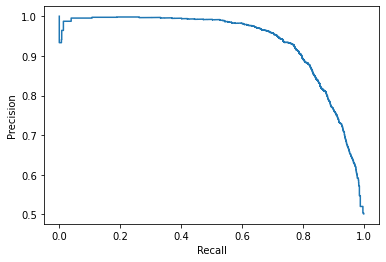

In [12]:
from sklearn.metrics import average_precision_score, precision_recall_curve, PrecisionRecallDisplay, auc, roc_curve

average_precision = average_precision_score(truth_labels, predicted_labels)
precision, recall, _ = precision_recall_curve(truth_labels, predicted_labels)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


In [13]:
area = auc(recall, precision)
area

0.9351845279996498

In [14]:
average_precision

0.9355278747168257

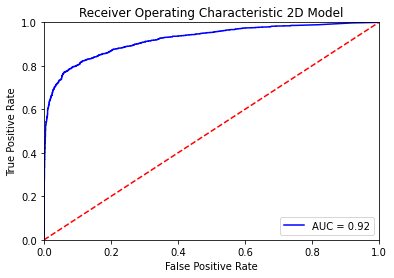

In [15]:
fpr, tpr, threshold = roc_curve(truth_labels, predicted_labels)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic 2D Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
# change to zeros and 1s
for i in range(len(predicted_labels)):
    if predicted_labels[i] > 0.5:
        predicted_labels[i] = 1
    else:
        predicted_labels[i] = 0

In [17]:
cm = confusion_matrix(truth_labels, predicted_labels)

In [18]:
cm

array([[1915,   85],
       [ 550, 1450]], dtype=int64)

<AxesSubplot:>

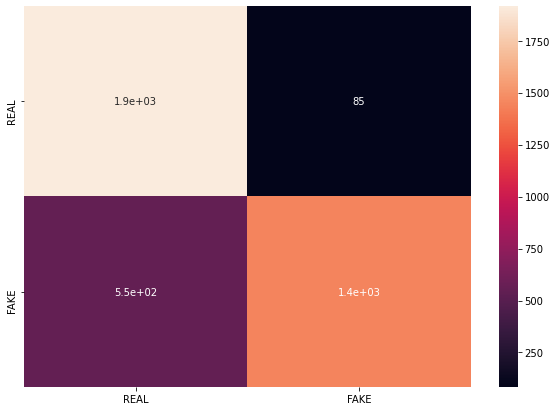

In [19]:
df_cm = pd.DataFrame(cm, index = target_names,
                  columns = target_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [20]:
print("Classification report for deepfake classifier:\n%s\n"
      % (classification_report(truth_labels, predicted_labels, target_names=target_names)))

Classification report for deepfake classifier:
              precision    recall  f1-score   support

        REAL       0.78      0.96      0.86      2000
        FAKE       0.94      0.72      0.82      2000

    accuracy                           0.84      4000
   macro avg       0.86      0.84      0.84      4000
weighted avg       0.86      0.84      0.84      4000




# 3D model

In [21]:
results_3D = r"D:/deepfakes/src/inference/scores_efficient_net4_3D.csv"

In [22]:
df_3D = pd.read_csv(results_3D)
predicted_labels_3D = df_3D["prediction"].values

In [23]:
loss_3D_model = log_loss(truth_labels, predicted_labels_3D)
loss_3D_model

0.3970306712840544

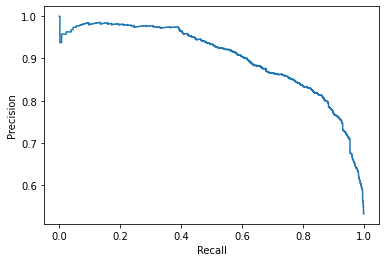

In [24]:
average_precision = average_precision_score(truth_labels, predicted_labels_3D)
precision, recall, _ = precision_recall_curve(truth_labels, predicted_labels_3D)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [25]:
area = auc(recall, precision)
area

0.9015728513843444

In [26]:
average_precision

0.9016900598589697

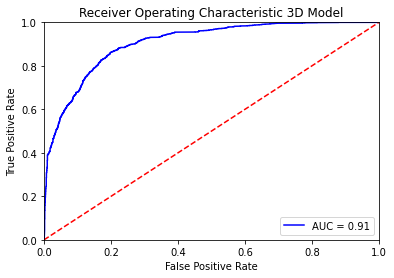

In [27]:
fpr, tpr, threshold = roc_curve(truth_labels, predicted_labels_3D)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic 3D Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
# change to zeros and 1s
for i in range(len(predicted_labels_3D)):
    if predicted_labels_3D[i] > 0.5:
        predicted_labels_3D[i] = 1
    else:
        predicted_labels_3D[i] = 0

In [29]:
cm = confusion_matrix(truth_labels, predicted_labels_3D)

<AxesSubplot:>

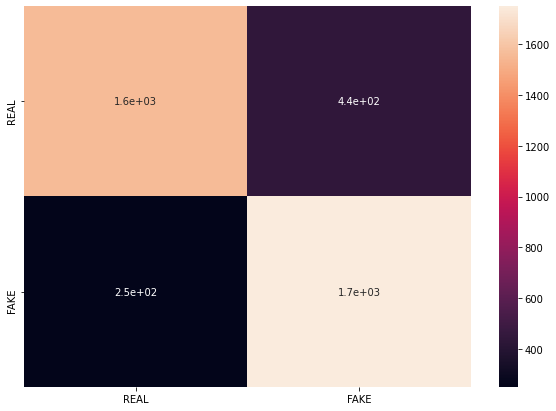

In [30]:
df_cm = pd.DataFrame(cm, index = target_names,
                  columns = target_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [31]:
print("Classification report for deepfake classifier:\n%s\n"
      % (classification_report(truth_labels, predicted_labels, target_names=target_names)))

Classification report for deepfake classifier:
              precision    recall  f1-score   support

        REAL       0.78      0.96      0.86      2000
        FAKE       0.94      0.72      0.82      2000

    accuracy                           0.84      4000
   macro avg       0.86      0.84      0.84      4000
weighted avg       0.86      0.84      0.84      4000




## Combine

In [41]:
predicted_labels_3D = pd.read_csv(results_3D).prediction.values
predicted_labels_2D = pd.read_csv(results_path).label.values

In [42]:
predicted_labels_2D

array([0.99000001, 0.98999995, 0.99000007, ..., 0.02214088, 0.95161897,
       0.99000001])

In [43]:
predicted_labels_3D

array([0.99000007, 0.99000019, 0.98105216, ..., 0.01735873, 0.92323989,
       0.98999995])

In [44]:
combined_labels = (predicted_labels_2D + predicted_labels_3D) / 2

In [45]:
combined_labels

array([0.99000004, 0.99000007, 0.98552611, ..., 0.01974981, 0.93742943,
       0.98999998])

In [46]:
loss_combined = log_loss(truth_labels, combined_labels)
# This is very good result
loss_combined

0.31058118136216034

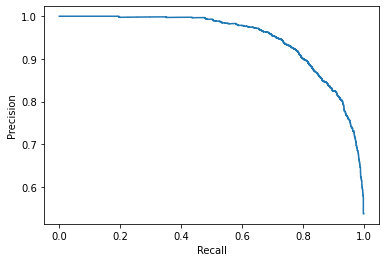

In [47]:
average_precision = average_precision_score(truth_labels, combined_labels)
precision, recall, _ = precision_recall_curve(truth_labels, combined_labels)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [48]:
area = auc(recall, precision)
area

0.9487135324981468

In [49]:
average_precision

0.9487262730751327

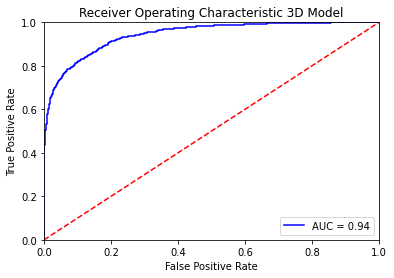

In [50]:
fpr, tpr, threshold = roc_curve(truth_labels, combined_labels)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic 3D Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
# change to zeros and 1s
for i in range(len(combined_labels)):
    if combined_labels[i] > 0.5:
        combined_labels[i] = 1
    else:
        combined_labels[i] = 0

In [52]:
cm = confusion_matrix(truth_labels, combined_labels)

<AxesSubplot:>

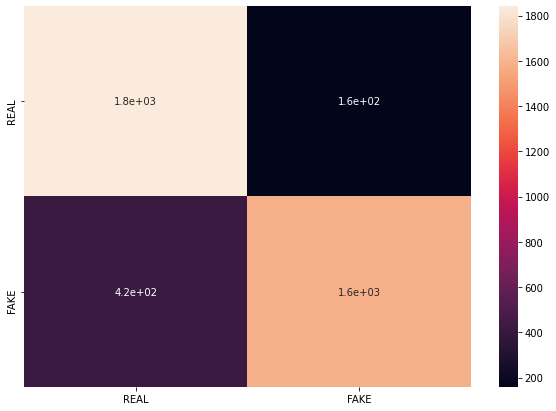

In [53]:
df_cm = pd.DataFrame(cm, index = target_names,
                  columns = target_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [55]:
print("Classification report for deepfake classifier:\n%s\n"
      % (classification_report(truth_labels, combined_labels, target_names=target_names)))

Classification report for deepfake classifier:
              precision    recall  f1-score   support

        REAL       0.82      0.92      0.86      2000
        FAKE       0.91      0.79      0.85      2000

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000


